In [1]:
import numpy as np, matplotlib.pyplot as plt
from tokenizer import Tokenizer
import torch
from tengan import Generator, SequenceGenerator
from file_reader import load_and_print_dataset
from run_tengan import fetch_malware_samples, read_generated_samples


In [2]:
# stpe 1: Load sequences dataset and fetch only positive (malware samples)

train_sequences, train_labels = load_and_print_dataset("data/train_dataset.json", print_data=False)

test_sequences, test_labels = load_and_print_dataset("data/test_dataset.json", print_data=False)

# return only positive samples
malware_train_sequences = fetch_malware_samples(train_sequences, train_labels)


malware_test_sequences = fetch_malware_samples(test_sequences, test_labels)


all_malware_samples = malware_train_sequences + malware_test_sequences 
all_sequences = train_sequences + test_sequences


In [3]:
all_data_lengths = [len(seq) for seq in all_sequences]
all_mal_lengths =  [len(seq) for seq in all_malware_samples]

Text(0.5, 1.0, 'Sequence lengths distribution')

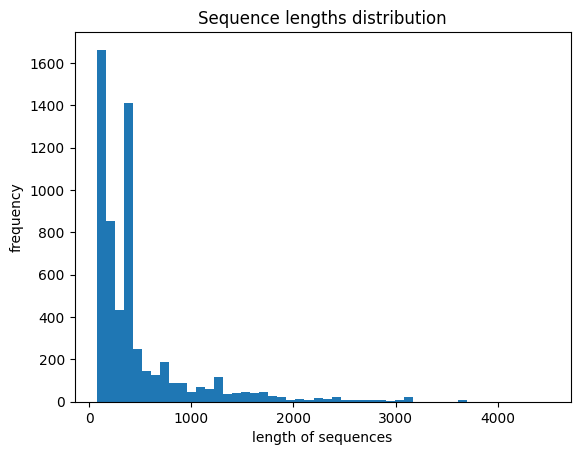

In [4]:
# plot lengths distribution

plt.hist(all_data_lengths, bins=50)
plt.xlabel('length of sequences')
plt.ylabel('frequency')
plt.title('Sequence lengths distribution')

In [5]:
np.percentile(all_data_lengths,80)

np.float64(611.0)

In [6]:
cutoff_length = int(np.percentile(all_mal_lengths,90))

cutoff_length

959

In [7]:
count_seqs = sum([1 for sl in all_mal_lengths if cutoff_length < sl])

# percetage loss
loss = count_seqs / len(all_mal_lengths) * 100
loss

10.05361930294906

In [8]:
# train_sequences, train_labels = load_and_print_dataset("data/train_dataset.json", print_data=False)

# test_sequences, test_labels = load_and_print_dataset("data/test_dataset.json", print_data=False)

sequences = train_sequences + test_sequences

# max_seq_len = max([len(s) for s in  malware_train_sequences])
# args.seq_length = max(args.seq_length, max_seq_len)

tokenizer = Tokenizer() # may pass this to all dataloaders for uniform encoding

tokenizer.build_vocab(sequences)

In [9]:
# tokenizer.tokenlist[50:]

In [10]:
batch_size = 16
vocab_size = len(tokenizer.tokenlist) 
seq_length = 256
embedding_dim = 64
num_heads = 4
num_encoders = 3
dim_feedforward = 64

In [11]:
tokenizer.end

'$'

In [12]:
# generator = Generator(vocab_size,embedding_dim,num_heads, num_encoders, dim_feedforward, seq_length) # may pass this to all dataloaders for uniform encoding
# PATH = "generator.pth"
# torch.save(generator.state_dict(), PATH)

generator = Generator.load_from_checkpoint("lightning_logs/version_16/checkpoints/epoch=94-step=3135.ckpt")
generator.eval()
sequence_sampler = SequenceGenerator(generator, tokenizer, seq_length, batch_size)

# sequence_sampler.sample_multi(n=batch_size * 5,filename="data/generated_data.csv")

/Users/gere/Desktop/research projects/gan_models/myenv/lib/python3.12/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [13]:
# Example usage
filename = 'data/generated_data.csv'
gen_samples = read_generated_samples(filename, clean=True, tokenizer=tokenizer, token2int=True) 

idx = np.random.randint(0, len(gen_samples))
# gen_samples[idx]

In [14]:
S = []
for seq in gen_samples:
    S.extend(seq)


In [15]:
# set(S)

In [16]:
# tokenizer.token_to_int

In [17]:
len(gen_samples[idx])

0

# Todo List - Tomorrow

1 - pretrain generator for 100 epochs and save it [DONE]

2 - pretrain discriminator for 100 epochs:

    a) generate samples and save them in generated_data.csv [DONE]
    b) train discriminator on generated_data.csv and real_data.csv  as defined in te run_tengan.py [DONE]
    c) save the discriminator model [DONE]

3 - load the generator and discriminator [DONE]

4 - train the generator and discriminator together for 20 to 100 epochs [DONE]

5 - save the final generator and discriminator models [DONE]

6 - generate samples from the final generator model and save them in final_samples.csv ( should be clean np pad, start, and end token).

7 - plot the samples from the final generator model [SKIP]

8 - TRAIN GIN model USING final_samples.csv and real training data

9 - Evaluate on GIN model on the test set.


In [18]:
# for seq in enumerate(gen_samples):
#     # print(tokenizer.int_to_token[token_id])

#     for token_id in seq:
#         # print(tokenizer.token_to_int[token_id])
#         print("token = ", token_id, "<--", end=" " ) # token_id,end=" "
#         print(tokenizer.int_to_token[token_id])

#         break


In [19]:
# for i, c in tokenizer.int_to_token.items():
#     if i < 50:
#         continue
#     print(i,"<--", c)

In [20]:

# decoded = [tokenizer.decode(seq.tolist()) for seq in gen_samples]

# decoded[0]

In [21]:
# gen_samples[0]

In [22]:
# tokenizer.decode(gen_samples[0].tolist())

In [23]:
# generate final_sample.csv
generator = Generator(vocab_size, embedding_dim, num_heads, num_encoders, dim_feedforward, seq_length)


# generator.load_state_dict(torch.load("saved_models/adv_generator_1.pt"))
generator = torch.load("saved_models/adv_generator_11.pt")
generator.eval()

sequence_sampler = SequenceGenerator(generator, tokenizer, seq_length, batch_size)

# torch.load()

/var/folders/jh/v7z14nr91s19659r8313h51c0000gn/T/ipykernel_40795/1717484331.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator = torch.load("saved_models/adv_gene

In [25]:
n =   1 #5 
sequence_sampler.sample_multi(n=batch_size * 5,filename="data/final_generated_data.csv")

  0%|          | 0/5 [00:00<?, ?it/s]

generating batches ...


 20%|██        | 1/5 [00:41<02:45, 41.33s/it]

generating batches ...


 40%|████      | 2/5 [00:58<01:21, 27.08s/it]

generating batches ...


 60%|██████    | 3/5 [01:15<00:45, 22.61s/it]

generating batches ...


 80%|████████  | 4/5 [01:32<00:20, 20.40s/it]

generating batches ...


100%|██████████| 5/5 [01:53<00:00, 22.61s/it]


writing samples to a file ...


[[1,
  121,
  99,
  90,
  167,
  92,
  5,
  92,
  54,
  54,
  75,
  16,
  31,
  86,
  93,
  54,
  92,
  75,
  8,
  92,
  59,
  104,
  52,
  61,
  92,
  94,
  92,
  109,
  92,
  107,
  162,
  153,
  8,
  54,
  105,
  92,
  75,
  1,
  61,
  124,
  75,
  75,
  78,
  75,
  75,
  92,
  16,
  5,
  16,
  96,
  16,
  4,
  72,
  42,
  26,
  75,
  5,
  75,
  16,
  61,
  162,
  39,
  62,
  92,
  153,
  75,
  26,
  16,
  16,
  16,
  62,
  107,
  75,
  75,
  75,
  104,
  88,
  75,
  134,
  79,
  75,
  144,
  92,
  75,
  92,
  78,
  75,
  75,
  16,
  91,
  164,
  88,
  72,
  75,
  59,
  48,
  177,
  75,
  63,
  29,
  95,
  174,
  75,
  75,
  75,
  88,
  75,
  75,
  75,
  16,
  24,
  92,
  59,
  65,
  75,
  92,
  75,
  61,
  16,
  31,
  16,
  107,
  130,
  144,
  16,
  4,
  75,
  24,
  16,
  169,
  75,
  49,
  75,
  22,
  75,
  75,
  75,
  92,
  61,
  4,
  92,
  75,
  75,
  92,
  75,
  75,
  16,
  75,
  75,
  112,
  54,
  152,
  75,
  16,
  151,
  75,
  75,
  132,
  75,
  57,
  108,
  75,
  93,
  16,

In [26]:
from graph_encoder import GraphEncoder
# from run_tengan import clean_sequences


def gen_fake_graphs( output_file_name:str="data/fake_graph_data.pkl", device=torch.device('cpu')):
    """
    Generate fake data using the provided model.

    Args:
        generator (torch.nn.Module): The model to use for generating fake data.
        labels (int): The labels to generate.
        tau (float): The temperature to generate tokens 
        hard (bool): to get perfect one-hot encoding or floating points like one-hot.
        output_file_name (str): file name to save generated data.

    Returns:
        fake_data (torch.Tensor): The generated fake data.
    """

    
    encoder = GraphEncoder()
    loaded_vocabs = encoder.load_vocabulary()
    vocabs = {int(key): int(value) for key, value in loaded_vocabs.items()}
    # vocab_size = len(vocabs)
    encoder.syscall_vocabs = vocabs # set vocabs to encoder
    # device = labels.device
    # generator = load_model(generator_name, args).to(device)
    # generator.eval() 

    
    # save generated data to a pickle file in data/fake_graph_data.pkl
    # with open("data/fake_graph_data.pkl", "wb") as f:
    # save generated data and labels
    gen_data = read_generated_samples("data/final_generated_data.csv", clean=True,tokenizer=tokenizer, token2int=True)
    fake_labels = ["malware"] * len(gen_data)
    # set syscall vocabs to the encoder object, making it compatible with the original data encoding.
    # setattr(encoder, "syscall_vocabs", loaded_vocabs)

    print(len(vocabs))

    gen_graphs, _ = encoder.fetch_graphs(gen_data, fake_labels)

    # save graph data
    encoder.save_graph_data(gen_graphs, output_file_name)

    # S = []
    # for seq in gen_data:
    #     S.extend(seq)

    # for token in set(S):
    #     print(encoder.syscall_vocabs[token])

    return gen_data, fake_labels, vocabs, gen_graphs

gen_data, _, _, gen_graphs = gen_fake_graphs()

175


In [28]:
gen_graphs[0]['graph']
# print([graph for graph in gen_graphs["graph"]])


Data(x=[66, 5], edge_index=[2, 161], num_nodes=66, edge_features=[161])